In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Read in csv file
df = pd.read_csv("election_data.csv")

#Filter for 2012 and 2016
df_2012 = df[df["year"] == 2012]
df_2016 = df[df["year"] == 2016]
df_2016.columns

Index(['year', 'state', 'state_po', 'county', 'FIPS', 'office', 'candidate',
       'party', 'candidatevotes', 'totalvotes', 'version'],
      dtype='object')

In [3]:
#Create pivot table with candidates as columns and votes as vales
pivot_2012 = df_2012.pivot(columns = "candidate", values = "candidatevotes")

#Merge pivot table with original 2012 dataframe
merged_2012 = df_2012.merge(pivot_2012, right_index=True, left_index=True)

#Group by state and county and sum (this allows all votes to be on same row)
merged_grouped_2012 = merged_2012.groupby(["state", "state_po", "county"]).sum()

#Select last three rows and transform to ints
election_2012 = merged_grouped_2012.iloc[:,-3:].astype(int)

#Create total votes column
election_2012["Total Votes"] = election_2012.sum(1)

#Create column for winner and margin of victory
election_2012["Winner"] = np.where(election_2012['Barack Obama']>election_2012["Mitt Romney"], 'Barack Obama', 'Mitt Romney')
election_2012["Margin"] = np.where(election_2012["Winner"]=="Mitt Romney", 
                                   election_2012["Mitt Romney"]-election_2012["Barack Obama"],
                                   election_2012["Barack Obama"]-election_2012["Mitt Romney"])
#Preview results
election_2012.head()


Barack Obama  Mitt Romney  Other  Total Votes  \
state   state_po county                                                   
Alabama AL       Autauga          6363        17379    190        23932   
                 Baldwin         18424        66016    898        85338   
                 Barbour          5912         5550     47        11509   
                 Bibb             2202         6132     86         8420   
                 Blount           2970        20757    279        24006   

                                Winner  Margin  
state   state_po county                         
Alabama AL       Autauga   Mitt Romney   11016  
                 Baldwin   Mitt Romney   47592  
                 Barbour  Barack Obama     362  
                 Bibb      Mitt Romney    3930  
                 Blount    Mitt Romney   17787

In [4]:
#Find total votes for Barack Obama 2012
obama_total = election_2012["Barack Obama"].sum()

#Find total votes for Mitt Romney 2012
romney_total = election_2012["Mitt Romney"].sum()

#Find total votes for Other 2012
other_2012_total = election_2012["Other"].sum()


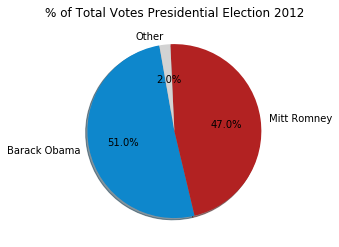

In [5]:
#Add labels
labels_2012 = ["Barack Obama", "Mitt Romney", "Other"]

#Add title
plt.title("% of Total Votes Presidential Election 2012")

#Set the values of each section of the pie chart
sizes_2012 = [obama_total, romney_total, other_2012_total]

#Set the colors of each section of the pie chart
colors_2012 = ["#0e87cc", "firebrick", "lightgray" ]

# Create the pie chart based upon the values above
plt.pie(sizes_2012, labels=labels_2012, colors=colors_2012,
        autopct="%1.1f%%", shadow=True, startangle=100)

#Show pie chart
plt.show()

In [6]:
#Create pivot table with candidates as columns and votes as vales
pivot_2016 = df_2016.pivot(columns = "candidate", values = "candidatevotes")

#Merge pivot table with original 2016 dataframe
merged_2016 = df_2016.merge(pivot_2016, right_index=True, left_index=True)

#Group by state and county and sum (this allows all votes to be on same row)
merged_grouped_2016 = merged_2016.groupby(["state","state_po", "county"]).sum()

#Select last three rows and transform to ints
election_2016 = merged_grouped_2016.iloc[:,-3:].astype(int)

#Create total votes column
election_2016["Total Votes"] = election_2016.sum(1)

#Create column for winner and margin of victory
election_2016["Winner"] = np.where(election_2016['Hillary Clinton']>election_2016["Donald Trump"], 'Hillary Clinton', 'Donald Trump')
election_2016["Margin"] = np.where(election_2016["Winner"]=="Donald Trump", 
                                   election_2016["Donald Trump"]-election_2016["Hillary Clinton"],
                                   election_2016["Hillary Clinton"]-election_2016["Donald Trump"])
#Preview results
election_2016.head()


Donald Trump  Hillary Clinton  Other  Total Votes  \
state   state_po county                                                       
Alabama AL       Autauga         18172             5936    865        24973   
                 Baldwin         72883            18458   3874        95215   
                 Barbour          5454             4871    144        10469   
                 Bibb             6738             1874    207         8819   
                 Blount          22859             2156    573        25588   

                                Winner  Margin  
state   state_po county                         
Alabama AL       Autauga  Donald Trump   12236  
                 Baldwin  Donald Trump   54425  
                 Barbour  Donald Trump     583  
                 Bibb     Donald Trump    4864  
                 Blount   Donald Trump   20703

In [7]:
#Find total votes for Donald Trump 2016
trump_total = election_2016["Donald Trump"].sum()

#Find total votes for Hillary Clinton 2016
clinton_total = election_2016["Hillary Clinton"].sum()

#Find total votes for Other 2016
other_2016_total = election_2016["Other"].sum()

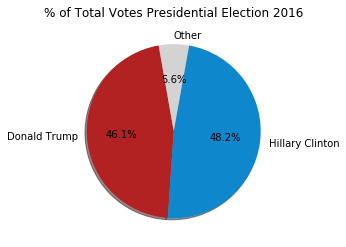

In [8]:
#Add labels
labels_2016 = ["Donald Trump", "Hillary Clinton", "Other"]

#Add title
plt.title("% of Total Votes Presidential Election 2016")

#Set the values of each section of the pie chart
sizes_2016 = [trump_total, clinton_total, other_2016_total]

#Set the colors of each section of the pie chart
colors_2016 = ["firebrick", "#0e87cc", "lightgray" ]

# Create the pie chart based upon the values above
plt.pie(sizes_2016, labels=labels_2016, colors=colors_2016,
        autopct="%1.1f%%", shadow=True, startangle=100)

#Show pie chart
plt.show()

In [9]:
#Join 2012 and 2016 dataframes
election_df = election_2012.join(election_2016, rsuffix = "_2016", lsuffix="_2012")

#Create column for percent change between total votes in 2012 and 2016
election_df["Total_Votes_Percent_Change"] = round((election_df["Total Votes_2016"] - election_df["Total Votes_2012"]) / election_df["Total Votes_2012"] * 100,2)

#Show results
election_df.head(10)

#export as CSV
election_df.reset_index().to_csv("2012_2016_election.csv")

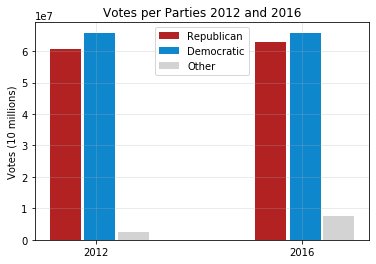

In [10]:
republican = (romney_total, trump_total)
democratic = (obama_total, clinton_total)
other = (other_2012_total, other_2016_total)

#The x locations for the groups
ind = np.arange(len(democratic)) 

#The width of the bars
width = 0.15  

#Create the bars
fig, ax = plt.subplots()
rects1 = plt.bar(ind - width, republican, width, label='Republican', color="firebrick")
rects2 = plt.bar(ind + width/9, democratic, width, label='Democratic', color="#0e87cc")
rects3 = plt.bar(ind + width*1.2, other, width, label='Other', color="lightgray")

# Add some text for labels, title
plt.ylabel('Votes (10 millions)')
plt.title('Votes per Parties 2012 and 2016')

#Add legend
plt.legend(loc= "upper center")

#Add grid
plt.grid(alpha= 0.3)

#Set ticks
plt.xticks(ind)

#Add tick labels
ax.set_xticklabels(('2012', '2016'))

#Show bar chart
plt.show()

In [11]:
#Store number of counties that changed parties between 2012 and 2016
Dem_Rep = len(election_df[(election_df.Winner_2012 == "Barack Obama") & (election_df.Winner_2016 == "Donald Trump")])
Rep_Dem = len(election_df[(election_df.Winner_2012 == "Mitt Romney") & (election_df.Winner_2016 == "Hillary Clinton")])

#NEED TO CREATE A CHART HERE

In [12]:
#Read in demographic data
demo_df = pd.read_csv("demographic_data.csv")

#Split data in county on the comma, replace "county" with ""
demo_df['county'] = demo_df['county'].str.split(',').str[0]
demo_df["county"] = demo_df.county.str.replace(" County", "",)

#Group data, export if necessary
grouped_demo = demo_df.groupby(["state", "county"]).sum()
#grouped_demo.reset_index().to_csv("grouped_demo.csv")

#Read in income and poverty data
income_df = pd.read_csv("income_data.csv")

#Replace "Parish" with ""
income_df["Name"] = income_df.Name.str.replace(" Parish", "")

#Replace "County" with ""
income_df["Name"] = income_df.Name.str.replace(" County", "")

#Replace "city" with ""
income_df["Name"] = income_df.Name.str.replace(" city", "")

income_df = income_df[["Postal Code", "Name", "Poverty Percent, All Ages", "Median Household Income"]]


In [13]:
#Read in clean data
election = pd.read_csv("2012_2016_election.csv")
demographics = pd.read_csv("demo_clean.csv")

#Replace "Parish" with ""
demographics["county"] = demographics.county.str.replace(" Parish", "")


In [14]:
#Merge dataframes
election_merged = pd.merge(election, demographics)
#election_merged = pd.merge(election_merged, income_df)

#Make new columns for dem/rep percent change
election_merged["Dem_Votes_Percent_Change"] = round((election_merged["Hillary Clinton"] - election_merged["Barack Obama"]) / election_merged["Barack Obama"] * 100,2)
election_merged["Rep_Votes_Percent_Change"] = round((election_merged["Donald Trump"] - election_merged["Mitt Romney"]) / election_merged["Mitt Romney"] * 100,2)

#dem_rep_df.reset_index(inplace=True)
election_merged.rename(columns={"state_po":"Postal Code"}, inplace=True)
income_df.rename(columns={"Name":"county"}, inplace=True)

election_merged = pd.merge(election_merged, income_df)
election_merged["Median Household Income"] = election_merged["Median Household Income"].str.replace(",","")
election_merged["Median Household Income"] = election_merged["Median Household Income"].astype("int")
election_merged["Poverty Percent, All Ages"] = election_merged["Poverty Percent, All Ages"].astype("float")

In [15]:
election_merged.rename(columns={"state_po":"Postal Code"}, inplace=True)

In [16]:
total_count = election_merged.state.value_counts()
population = election_merged.groupby("state")["total_population"].sum()
switched_count = dem_rep_df.state.value_counts()

switch = pd.DataFrame({
    "switched": switched_count,
    "total":total_count,
    "population":population.apply(lambda x: f"{x:,.0f}")
})

switch.dropna(inplace=True)
switch["%_Change"] = round(switch.switched / switch.total * 100,2)
switch.sort_values("%_Change", ascending=False, inplace=True)

switch.head()

NameError: name 'dem_rep_df' is not defined

In [17]:
age_bins = [0, 34, 40, 45, 100]
age_names = ["<35", "36-40", "41-45", "$46+"]
income_bins = [0, 34999, 45000, 55000, 65000, 75000, 200000]
income_names = ["<$35,000", "$35,001-$45,000", "$45,001-$55,000", "$55,001-$65,000", "$65,001-$75,000", "$75,001+"]

election_merged["Age Ranges"] = pd.cut(election_merged["median_age"], age_bins, labels = age_names)
election_merged["Median Income Ranges"] = pd.cut(election_merged["Median Household Income"], income_bins, labels = income_names)

In [18]:
#Create dataframe for counties than switched
rep_dem_df = election_merged[(election_merged.Winner_2012 == "Mitt Romney") & (election_merged.Winner_2016 == "Hillary Clinton")]
dem_rep_df = election_merged[(election_merged.Winner_2012 == "Barack Obama") & (election_merged.Winner_2016 == "Donald Trump")]

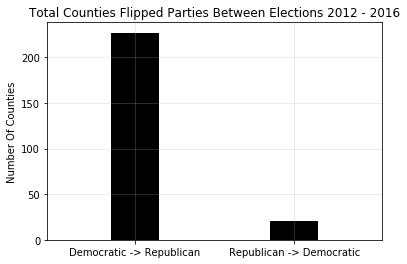

In [19]:
parties_flipped = [Dem_Rep, Rep_Dem]

#The x location
x_axis = np.arange(len(parties_flipped))

#Create the bars
plt.bar(x_axis, parties_flipped, color='black', align="center",  width=0.3)

#Set ticks
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["Democratic -> Republican", "Republican -> Democratic"])

# Set the limits of the x axis
plt.xlim(-0.55, len(x_axis)-0.45)

#Add grid
plt.grid(alpha= 0.3)

#Add title and labels
plt.title("Total Counties Flipped Parties Between Elections 2012 - 2016")
plt.ylabel("Number Of Counties")

#Show bar chart
plt.show()

In [20]:
switch_sum = dem_rep_df.sum()

percent_change_dem = (switch_sum["Hillary Clinton"] - switch_sum["Barack Obama"]) / switch_sum["Barack Obama"] * 100
percent_change_rep = (switch_sum["Donald Trump"] - switch_sum["Mitt Romney"]) / switch_sum["Mitt Romney"] * 100

print(percent_change_dem)
print(percent_change_rep)

-13.854036169259235
18.082919814681905


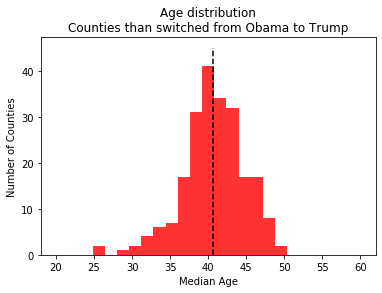

In [182]:
dem_rep_df["median_age"].plot(kind="hist", bins=25, alpha = 0.8, color = 'r', range =(20,60))
plt.xlabel("Median Age")
plt.ylabel("Number of Counties")
plt.title("Age distribution\nCounties than switched from Obama to Trump")
plt.vlines(dem_rep_df["median_age"].mean(), ymin=0,ymax=45,linestyles ="dashed")


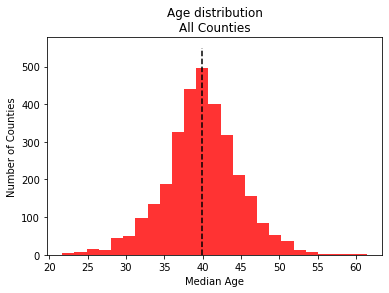

In [183]:
election_merged["median_age"].plot(kind="hist", bins=25, alpha = 0.8, color = 'r')
plt.xlabel("Median Age")
plt.ylabel("Number of Counties")
plt.title("Age distribution\nAll Counties")
plt.vlines(election_merged["median_age"].mean(), ymin=0,ymax=550, linestyles ="dashed")

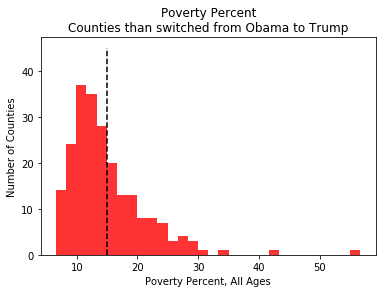

In [184]:
dem_rep_df['Poverty Percent, All Ages'].plot(kind="hist", bins=30, alpha = 0.8, color = 'r')
plt.xlabel("Poverty Percent, All Ages")
plt.ylabel("Number of Counties")
plt.title("Poverty Percent\nCounties than switched from Obama to Trump")
plt.vlines(dem_rep_df['Poverty Percent, All Ages'].mean(), ymin=0,ymax=45,linestyles ="dashed")

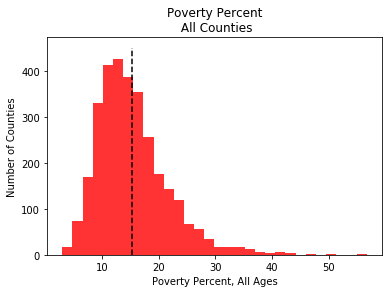

In [185]:
election_merged['Poverty Percent, All Ages'].plot(kind="hist", bins=30, alpha = 0.8, color = 'r')
plt.xlabel("Poverty Percent, All Ages")
plt.ylabel("Number of Counties")
plt.title("Poverty Percent\n All Counties")
plt.vlines(election_merged['Poverty Percent, All Ages'].mean(), ymin=0,ymax=450,linestyles ="dashed")

In [186]:
election_merged.columns

Index(['Unnamed: 0', 'state', 'Postal Code', 'county', 'Barack Obama',
       'Mitt Romney', 'Other_2012', 'Total Votes_2012', 'Winner_2012',
       'Margin_2012', 'Donald Trump', 'Hillary Clinton', 'Other_2016',
       'Total Votes_2016', 'Winner_2016', 'Margin_2016',
       'Total_Votes_Percent_Change', 'median_age', 'unemployment',
       'total_population', 'graduate_degree', 'at_least_bachelor_s_degree',
       'at_least_high_school_diploma', 'less_than_high_school',
       'median_earnings_2010_dollars', 'white', 'black', 'hispanic', 'asian',
       'farming_fishing_and_forestry_occupations',
       'construction_extraction_maintenance_and_repair_occupations',
       'management_professional_and_related_occupations',
       'production_transportation_and_material_moving_occupations',
       'sales_and_office_occupations', 'service_occupations',
       'Dem_Votes_Percent_Change', 'Rep_Votes_Percent_Change',
       'Poverty Percent, All Ages', 'Median Household Income', 'Age Ranges

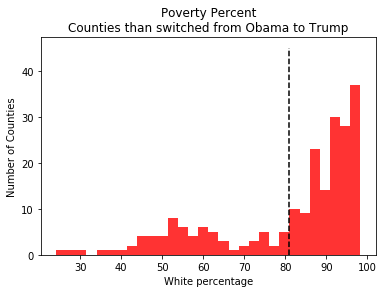

In [187]:
dem_rep_df['white'].plot(kind="hist", bins=30, alpha = 0.8, color = 'r')
plt.xlabel("White percentage")
plt.ylabel("Number of Counties")
plt.title("Poverty Percent\nCounties than switched from Obama to Trump")
plt.vlines(dem_rep_df['white'].mean(), ymin=0,ymax=45,linestyles ="dashed")

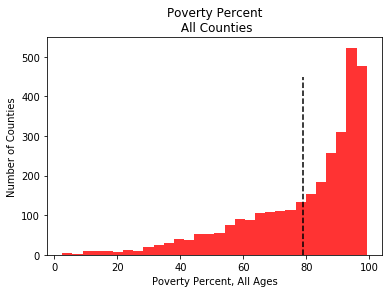

In [188]:
election_merged['white'].plot(kind="hist", bins=30, alpha = 0.8, color = 'r')
plt.xlabel("Poverty Percent, All Ages")
plt.ylabel("Number of Counties")
plt.title("Poverty Percent\n All Counties")
plt.vlines(election_merged['white'].mean(), ymin=0,ymax=450,linestyles ="dashed")